https://www.kaggle.com/c/titanic

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

In [3]:
sns.set_style()
pd.options.display.notebook_repr_html = False
pd.options.display.max_rows = 20

In [4]:
train = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)

In [5]:
def predictions_export(predicted_labels, file_name):
    result_df = pd.read_csv('test.csv', usecols=['PassengerId'], header=0)
    result_df['Survived'] = predicted_labels.astype(int)
    result_df.to_csv(file_name, index=False)
    print 'Result Set Shape: ', shape(result_df), '\n'
    print 'Sample: ', result_df[:5]

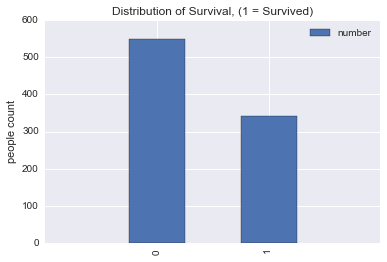

In [6]:
# train.groupby('Survived').count()['PassengerId'].plot(kind='bar') # ten sam efekt co poniżej
# specifies the parameters of our graphs
fig = plt.figure(figsize=(6,4), dpi=1600) 
# plots a bar graph of those who surived vs those who did not.               
ax1 = train.Survived.value_counts().plot(kind='bar', alpha=0.99)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# plots an axis lable
plt.ylabel("people count")    
# sets our legend for our graph.
plt.legend((['number']),loc='best') 
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)");

# Data Wrangling

## Strings to numbers conversions. Filling up empty records.

In [7]:
# Gender: 'Sex' to numbers mapping
train['Gender'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Gender'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [8]:
# Port_no: 'Embarked' to number mapping
train['Port_no'] = train['Embarked'].dropna().map({'S':0, 'C':1, 'Q':2}).astype(int) ## jest kilka wartosci typu nan. Trzeba zrobic dropna()
test['Port_no'] = test['Embarked'].dropna().map({'S':0, 'C':1, 'Q':2}).astype(int)

Mean:  29.6991176471
Median:  28.0
       Age          
Pclass   1   2     3
Gender              
0       35  28  21.5
1       40  30  25.0


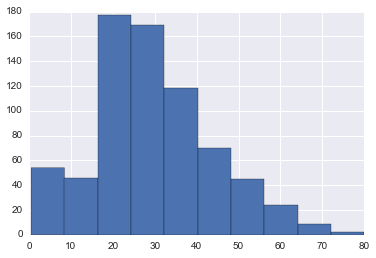

In [9]:
# Age_fill: Age and missing age data into new column
print 'Mean: ', train['Age'].mean()
print 'Median: ', train['Age'].median()
train.Age.hist(figsize=(6,4));

train['AgeFill'] = train['Age']
test['AgeFill'] = test['Age']

age_map_df = train[['Gender', 'Pclass', 'Age']].groupby(['Gender', 'Pclass']).median().unstack()
print age_map_df

for i in range(0, 2):
    for j in range(0, 3):
        train.loc[(train.Age.isnull()) & (train.Gender == i) & (train.Pclass == j+1), 'AgeFill'] = age_map_df.ix[i,j]
        test.loc[(test.Age.isnull()) & (test.Gender == i) & (test.Pclass == j+1), 'AgeFill'] = age_map_df.ix[i,j]

In [10]:
# AgeIsNull: Whether age was missing or not (1=missing)
train['AgeIsNull'] = pd.isnull(train.Age).astype(int)
test['AgeIsNull'] = pd.isnull(test.Age).astype(int)

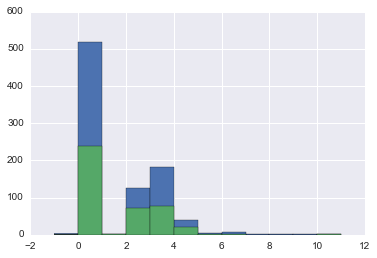

In [11]:
# Title column
train.loc[train['Name'].str.contains('Mr. ')==True, 'Title'] = 'MR' 
train.loc[train['Name'].str.contains('Ms. ')==True, 'Title'] = 'MS' 
train.loc[train['Name'].str.contains('Mrs. ')==True, 'Title'] = 'MRS' 
train.loc[train['Name'].str.contains('Miss. ')==True, 'Title'] = 'MISS' 
train.loc[train['Name'].str.contains('Master. ')==True, 'Title'] = 'MASTER' 
train.loc[train['Name'].str.contains('Rev. ')==True, 'Title'] = 'REV' 
train.loc[train['Name'].str.contains('Dr. ')==True, 'Title'] = 'DR' 
train.loc[train['Name'].str.contains('Mme. ')==True, 'Title'] = 'MME' 
train.loc[train['Name'].str.contains('Major. ')==True, 'Title'] = 'Major' 
train.loc[train['Name'].str.contains('Sir. ')==True, 'Title'] = 'SIR' 
train.loc[train['Name'].str.contains('Col. ')==True, 'Title'] = 'COL' 
train.loc[train['Name'].str.contains('Capt. ')==True, 'Title'] = 'CAPT' 

test.loc[test['Name'].str.contains('Mr. ')==True, 'Title'] = 'MR' 
test.loc[test['Name'].str.contains('Ms. ')==True, 'Title'] = 'MS' 
test.loc[test['Name'].str.contains('Mrs. ')==True, 'Title'] = 'MRS' 
test.loc[test['Name'].str.contains('Miss. ')==True, 'Title'] = 'MISS' 
test.loc[test['Name'].str.contains('Master. ')==True, 'Title'] = 'MASTER' 
test.loc[test['Name'].str.contains('Rev. ')==True, 'Title'] = 'REV' 
test.loc[test['Name'].str.contains('Dr. ')==True, 'Title'] = 'DR' 
test.loc[test['Name'].str.contains('Mme. ')==True, 'Title'] = 'MME' 
test.loc[test['Name'].str.contains('Major. ')==True, 'Title'] = 'Major' 
test.loc[test['Name'].str.contains('Sir. ')==True, 'Title'] = 'SIR' 
test.loc[test['Name'].str.contains('Col. ')==True, 'Title'] = 'COL' 
test.loc[test['Name'].str.contains('Capt. ')==True, 'Title'] = 'CAPT' 

train.Title.fillna('xxx', inplace=True) 
test.Title.fillna('xxx', inplace=True) 

# Title to number mapping
train['Title_num'] = train['Title'].map( {'xxx': -1, 'MR': 0, 'MS': 1, 'MRS': 2, 'MISS': 3, 'MASTER': 4, 'REV': 5, 'DR': 6, 'MME': 7, 'Major': 8, 'SIR': 9, 'COL': 10, 'CAPT': 11} ).astype(int)
test['Title_num'] = test['Title'].map( {'xxx': -1, 'MR': 0, 'MS': 1, 'MRS': 2, 'MISS': 3, 'MASTER': 4, 'REV': 5, 'DR': 6, 'MME': 7, 'Major': 8, 'SIR': 9, 'COL': 10, 'CAPT': 11} ).astype(int)

train['Title_num'].hist(bins=range(-1,12), figsize=(6,4))
test['Title_num'].hist(bins=range(-1,12), figsize=(6,4));

In [12]:
# Filling up missing 'Fare' value

#test.ix[test.isnull().any(axis=1)]
for i in range(1, 4):
    test.loc[test.Fare.isnull() & test.Pclass==i,'Fare'] = test.groupby('Pclass').mean()['Fare'][i].round()

## Feature Engineering

In [13]:
# FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

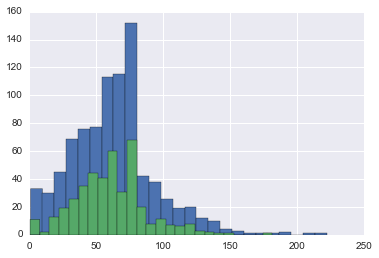

In [14]:
# Age*Class
train['Age*Class'] = train.AgeFill * train.Pclass
test['Age*Class'] = test.AgeFill * test.Pclass

train['Age*Class'].hist(bins=25, figsize=(6,4))
test['Age*Class'].hist(bins=25, figsize=(6,4));

## Non-numeric columns removal

In [15]:
train.dtypes[train.dtypes.map(lambda x: x=='object')]
test.dtypes[test.dtypes.map(lambda x: x=='object')]

train.dtypes[train.dtypes.map(lambda x: x=='object')].index
test.dtypes[test.dtypes.map(lambda x: x=='object')].index

# count NaN values
train.isnull().sum()

train.drop([u'PassengerId', u'Age', u'Name', u'Sex', u'Ticket', u'Cabin', u'Embarked', u'Title'], axis=1, inplace=True)
test.drop([u'PassengerId', u'Age', u'Name', u'Sex', u'Ticket', u'Cabin', u'Embarked', u'Title'], axis=1, inplace=True)

In [16]:
# Remove remaining recoords with NaN values 
print 'Train - wartosci NaN: ',  len(train) - len(train.dropna())
train.dropna(inplace=True)

Train - wartosci NaN:  2


In [17]:
# Are there any NaN values in Test set?
print 'Test - wartosci NaN: ',  len(test) - len(test.dropna())

Test - wartosci NaN:  0


##### Scikit-learn needs arrays

In [18]:
train_data = train.values
train_data

array([[  0. ,   3. ,   1. , ...,   0. ,   1. ,  66. ],
       [  1. ,   1. ,   1. , ...,   2. ,   1. ,  38. ],
       [  1. ,   3. ,   0. , ...,   3. ,   0. ,  78. ],
       ..., 
       [  0. ,   3. ,   1. , ...,   3. ,   3. ,  64.5],
       [  1. ,   1. ,   0. , ...,   0. ,   0. ,  26. ],
       [  0. ,   3. ,   0. , ...,   0. ,   0. ,  96. ]])

In [19]:
test_data = test.values
test_data

array([[   3. ,    0. ,    0. , ...,    0. ,    0. ,  103.5],
       [   3. ,    1. ,    0. , ...,    2. ,    1. ,  141. ],
       [   2. ,    0. ,    0. , ...,    0. ,    0. ,  124. ],
       ..., 
       [   3. ,    0. ,    0. , ...,    0. ,    0. ,  115.5],
       [   3. ,    0. ,    0. , ...,    0. ,    0. ,   75. ],
       [   3. ,    1. ,    1. , ...,    4. ,    2. ,   75. ]])

# Data visualization

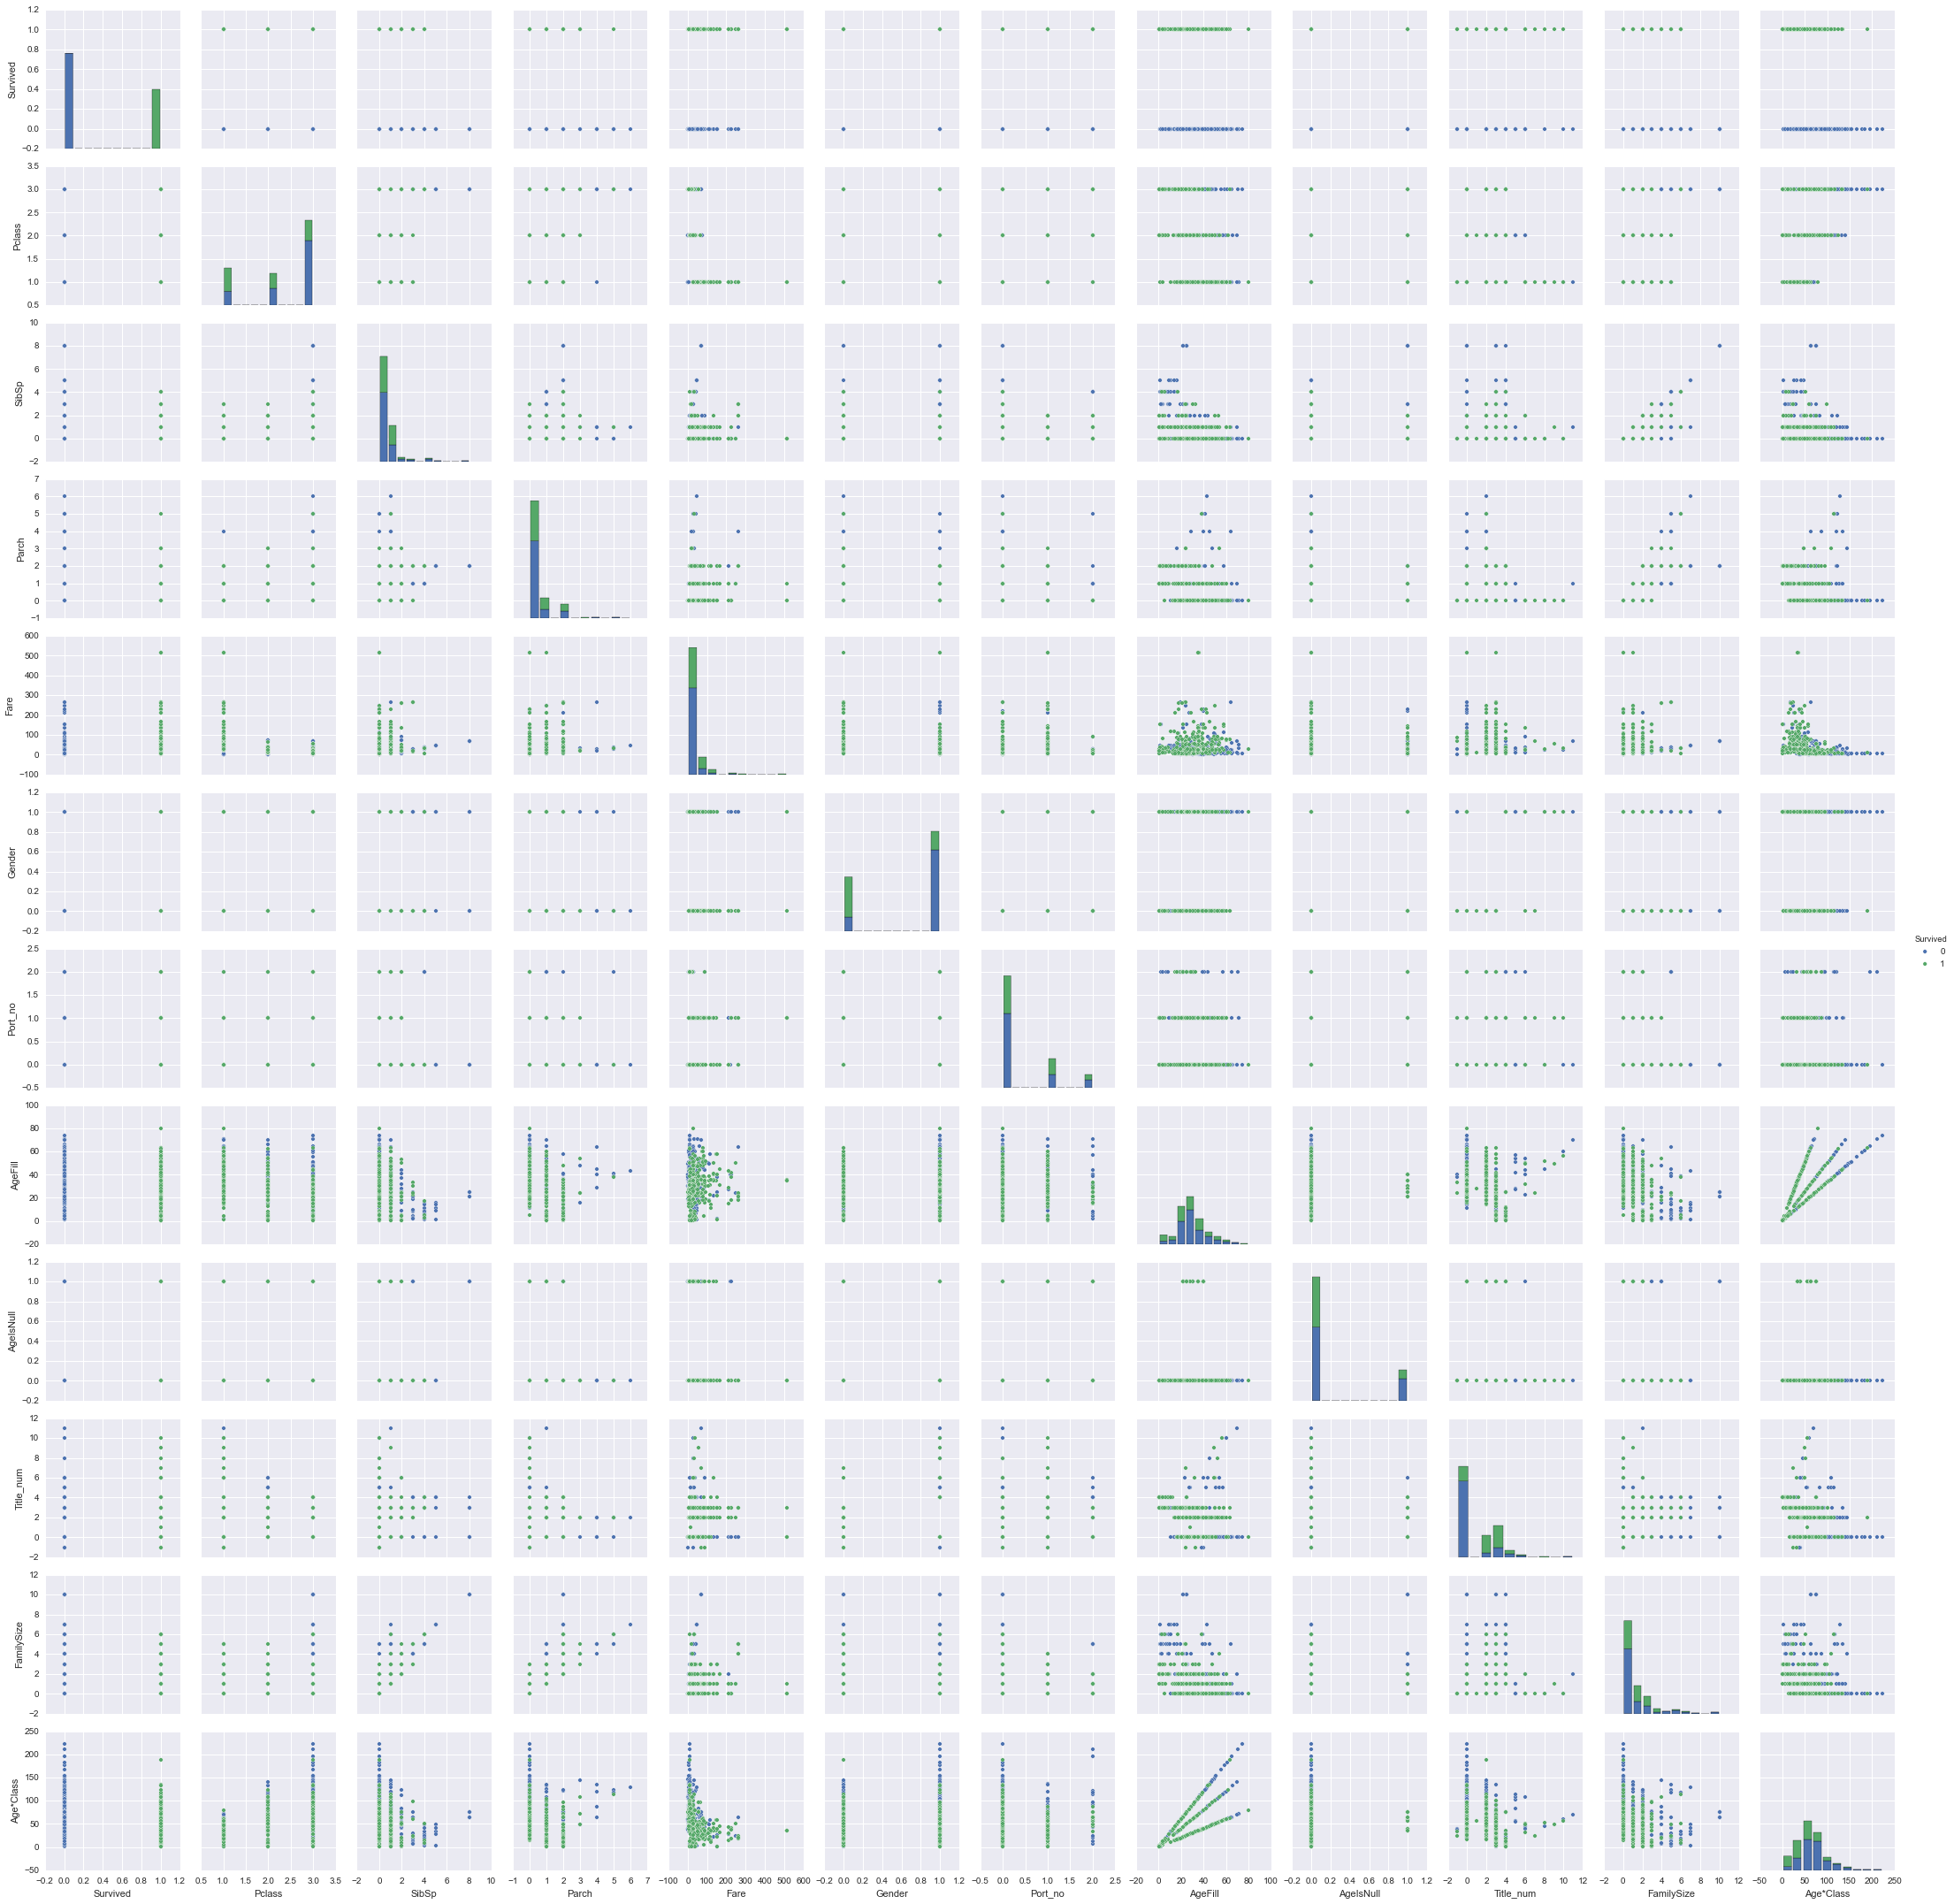

In [20]:
sns.pairplot(train, hue="Survived");

C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


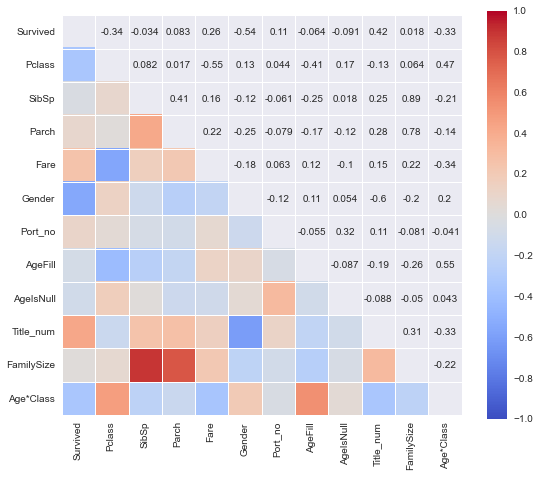

In [21]:
f, ax = plt.subplots(figsize=(8, 8))
sns.corrplot(train, annot=True, sig_stars=False, diag_names=False)#, ax=ax,cmap=cmap)
f.tight_layout();

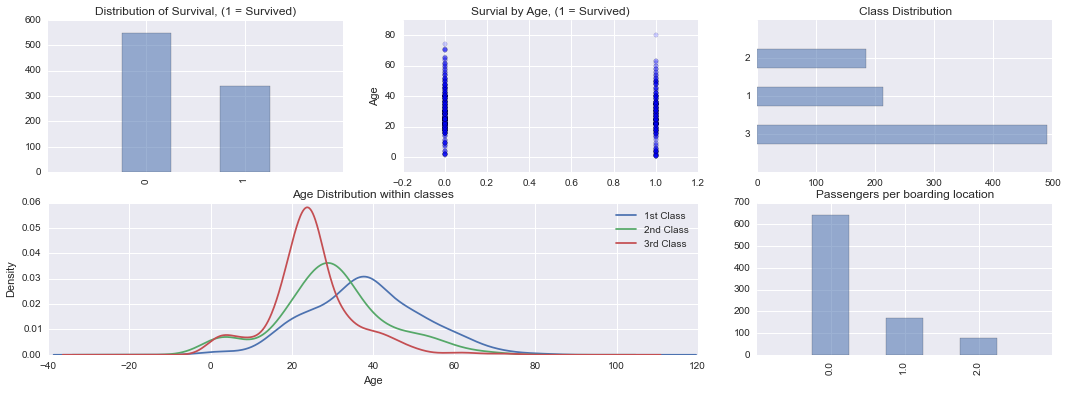

In [22]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not. 
train.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)") 

plt.subplot2grid((2,3),(0,1))
plt.scatter(train.Survived, train.AgeFill, alpha=alpha_scatterplot)
# sets the y axis lablea
plt.ylabel("Age")
# formats the grid line style of our graphs 
plt.grid(b=True, which='major', axis='y') 
plt.title("Survial by Age, (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
train.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(train.Pclass.value_counts()))
plt.title("Class Distribution")

ax4 = plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
train.AgeFill[train.Pclass == 1].plot(kind='kde', ax=ax4) 
train.AgeFill[train.Pclass == 2].plot(kind='kde', ax=ax4)
train.AgeFill[train.Pclass == 3].plot(kind='kde', ax=ax4)
# plots an axis lable
ax4.set_xlabel("Age") 
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
train.Port_no.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(train.Port_no.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location");

# Data Transformations

In [23]:
from sklearn import cross_validation

In [24]:
# Change the column's order
train_nona = train[['Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'Gender',
 'Port_no',
 'AgeFill',
 'AgeIsNull',
 'Title_num',
 'FamilySize',
 'Age*Class', 
 'Survived']].dropna().copy()
train_data = train_nona.values

In [25]:
# random split into training and test sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_data[:,:-1], train_data[:,-1], test_size=0.4, random_state=0)
print 'train: ', X_train.shape, y_train.shape
print 'test: ', X_test.shape, y_test.shape

train:  (533L, 11L) (533L,)
test:  (356L, 11L) (356L,)


## Scaling

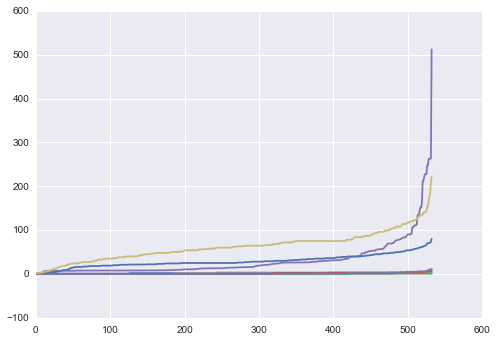

In [26]:
for i in range(len(X_train[0])):
    plt.plot(sort(X_train[:,i]))

In [27]:
from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train).astype(float).round(2)
y_train_scaled = preprocessing.scale(y_train).astype(float).round(2)
X_test_scaled = preprocessing.scale(X_test).astype(float).round(2)
y_test_scaled = preprocessing.scale(y_test).astype(float).round(2)

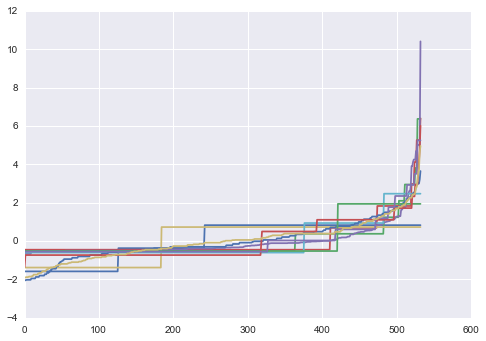

In [28]:
for i in range(len(X_train_scaled[0])):
    plt.plot(sort(X_train_scaled[:,i]))

In [29]:
# After scaling, mean value of every column is close to zero
print 'Mean: ', X_train_scaled.mean(axis=0).round(2)
print 'Std: ', X_train_scaled.std(axis=0).round(2)

Mean:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Std:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


## Normalization

In [30]:
# normalizacja l2

X_train_norm = preprocessing.normalize(X_train, norm='l2').astype(float).round(2)
#y_train_norm = preprocessing.normalize(y_train.reshape(-1, 1), norm='l2').astype(float).round(2)
X_test_norm = preprocessing.normalize(X_test, norm='l2').astype(float).round(2)
#y_test_norm = preprocessing.normalize(y_test.reshape(-1, 1), norm='l2').astype(float).round(2)

# Classifications

## SMV (Support Vector Machine)

In [31]:
from sklearn import svm

In [32]:
# base check_classification_targets
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train) # Support Vector Classifier
clf.score(X_test, y_test)

0.77247191011235961

In [33]:
clf = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)
clf.score(X_test, y_test)

0.77247191011235961

In [34]:
# bardzo obciazajace obliczeniowo
clf = svm.SVC(kernel='linear', C=100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.77247191011235961

In [35]:
#test_predictions = clf.predict(test.dropna().values)
#test_predictions

### Using 'l2' normalized data

In [36]:
# base check_classification_targets
clf = svm.SVC(kernel='linear', C=1).fit(X_train_norm, y_train) # Support Vector Classifier
clf.score(X_test_norm, y_test)

0.7078651685393258

In [37]:
clf = svm.SVC(kernel='linear', C=10).fit(X_train_norm, y_train)
clf.score(X_test_norm, y_test)

0.7219101123595506

In [38]:
# bardzo obciazajace obliczeniowo
clf = svm.SVC(kernel='linear', C=100).fit(X_train_norm, y_train)
clf.score(X_test_norm, y_test)

0.7752808988764045

### Using Grid Search to find best classificator's parameters

In [39]:
from sklearn import grid_search
svr = svm.SVC() 
print type(svr)
svr.get_params() # show estimator parameters

<class 'sklearn.svm.classes.SVC'>


{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [40]:
# the following (kernel, C) combinations will be generated: [('rbf', 1), ('rbf', 10), ('rbf', 100), ('linear', 1), ('linear', 10), ('linear', 100)]
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
clf = grid_search.GridSearchCV(svr, parameters)    #type(clf): sklearn.grid_search.GridSearchCV
clf.fit(X_train, y_train)
print 'Wynik/score: ', clf.grid_scores_
# best estimator based on accuracy score
print 'Najlepszy estymator ', clf.best_estimator_

Wynik/score:  [mean: 0.81989, std: 0.00919, params: {'kernel': 'linear', 'C': 1}, mean: 0.69606, std: 0.03166, params: {'kernel': 'rbf', 'C': 1}, mean: 0.81801, std: 0.01150, params: {'kernel': 'linear', 'C': 10}, mean: 0.69981, std: 0.01817, params: {'kernel': 'rbf', 'C': 10}, mean: 0.81801, std: 0.02034, params: {'kernel': 'linear', 'C': 100}, mean: 0.69418, std: 0.02232, params: {'kernel': 'rbf', 'C': 100}]
Najlepszy estymator  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [41]:
# using normalized data
clf.fit(X_train_norm, y_train)
clf.grid_scores_
#predicted = best_clf.predict(X_test)

[mean: 0.69043, std: 0.05551, params: {'kernel': 'linear', 'C': 1},
 mean: 0.69418, std: 0.06895, params: {'kernel': 'rbf', 'C': 1},
 mean: 0.73358, std: 0.04316, params: {'kernel': 'linear', 'C': 10},
 mean: 0.70919, std: 0.05764, params: {'kernel': 'rbf', 'C': 10},
 mean: 0.79925, std: 0.03293, params: {'kernel': 'linear', 'C': 100},
 mean: 0.74109, std: 0.05394, params: {'kernel': 'rbf', 'C': 100}]

## DecisionTreeClassifier

In [42]:
import sklearn.tree as tree
clf_dt = tree.DecisionTreeClassifier()
#clf.get_params().keys()

min_samples_split = range(2,110,10)
min_samples_leaf = range(1,110,10)
max_depth = range(1,110,10) + [None]

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':min_samples_split, 
              'min_samples_leaf':min_samples_leaf,
              'max_depth': max_depth 
             }

clf_dt = grid_search.GridSearchCV(clf_dt, parameters)  # with default 3-fold cross-validation
clf_dt.fit(train_data[:,:-1], np.reshape(train_data[:,-1:], (1, len(train_data)))[0])

# Results:
print 'Best score: ', clf_dt.best_score_, ', using metric: ', clf_dt.scorer_.func_name
print 'Best parameters: ', clf_dt.best_params_
print 'Best estimator: ', clf_dt.best_estimator_

Best score:  0.817772778403 , using metric:  _passthrough_scorer
Best parameters:  {'min_samples_split': 32, 'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 11}
Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=11,
            min_samples_split=32, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


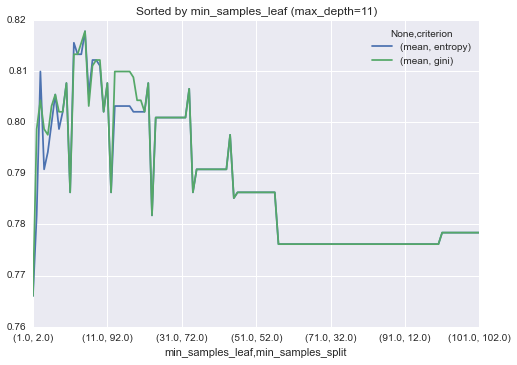

In [66]:
############################# Plot results #####################################################
col_list = ['mean', 'std', 'criterion', 'min_samples_leaf', 'min_samples_split', 'max_depth']
df = pd.DataFrame(columns=col_list)
for params, mean_score, scores in clf_dt.grid_scores_:    
    df = df.append(pd.Series([mean_score, 
                              scores.std(), 
                              params['criterion'],
                              params['min_samples_leaf'],
                              params['min_samples_split'],
                              params['max_depth']
                             ], 
                   index=col_list), ignore_index=True)
dfx = df.set_index(['min_samples_leaf', 'min_samples_split', 'max_depth', 'criterion']).unstack(-1)
dfx.xs(11, level=2, axis=0)[['mean']].sortlevel(level=0).plot()
plt.title('Sorted by min_samples_leaf (max_depth=11)');

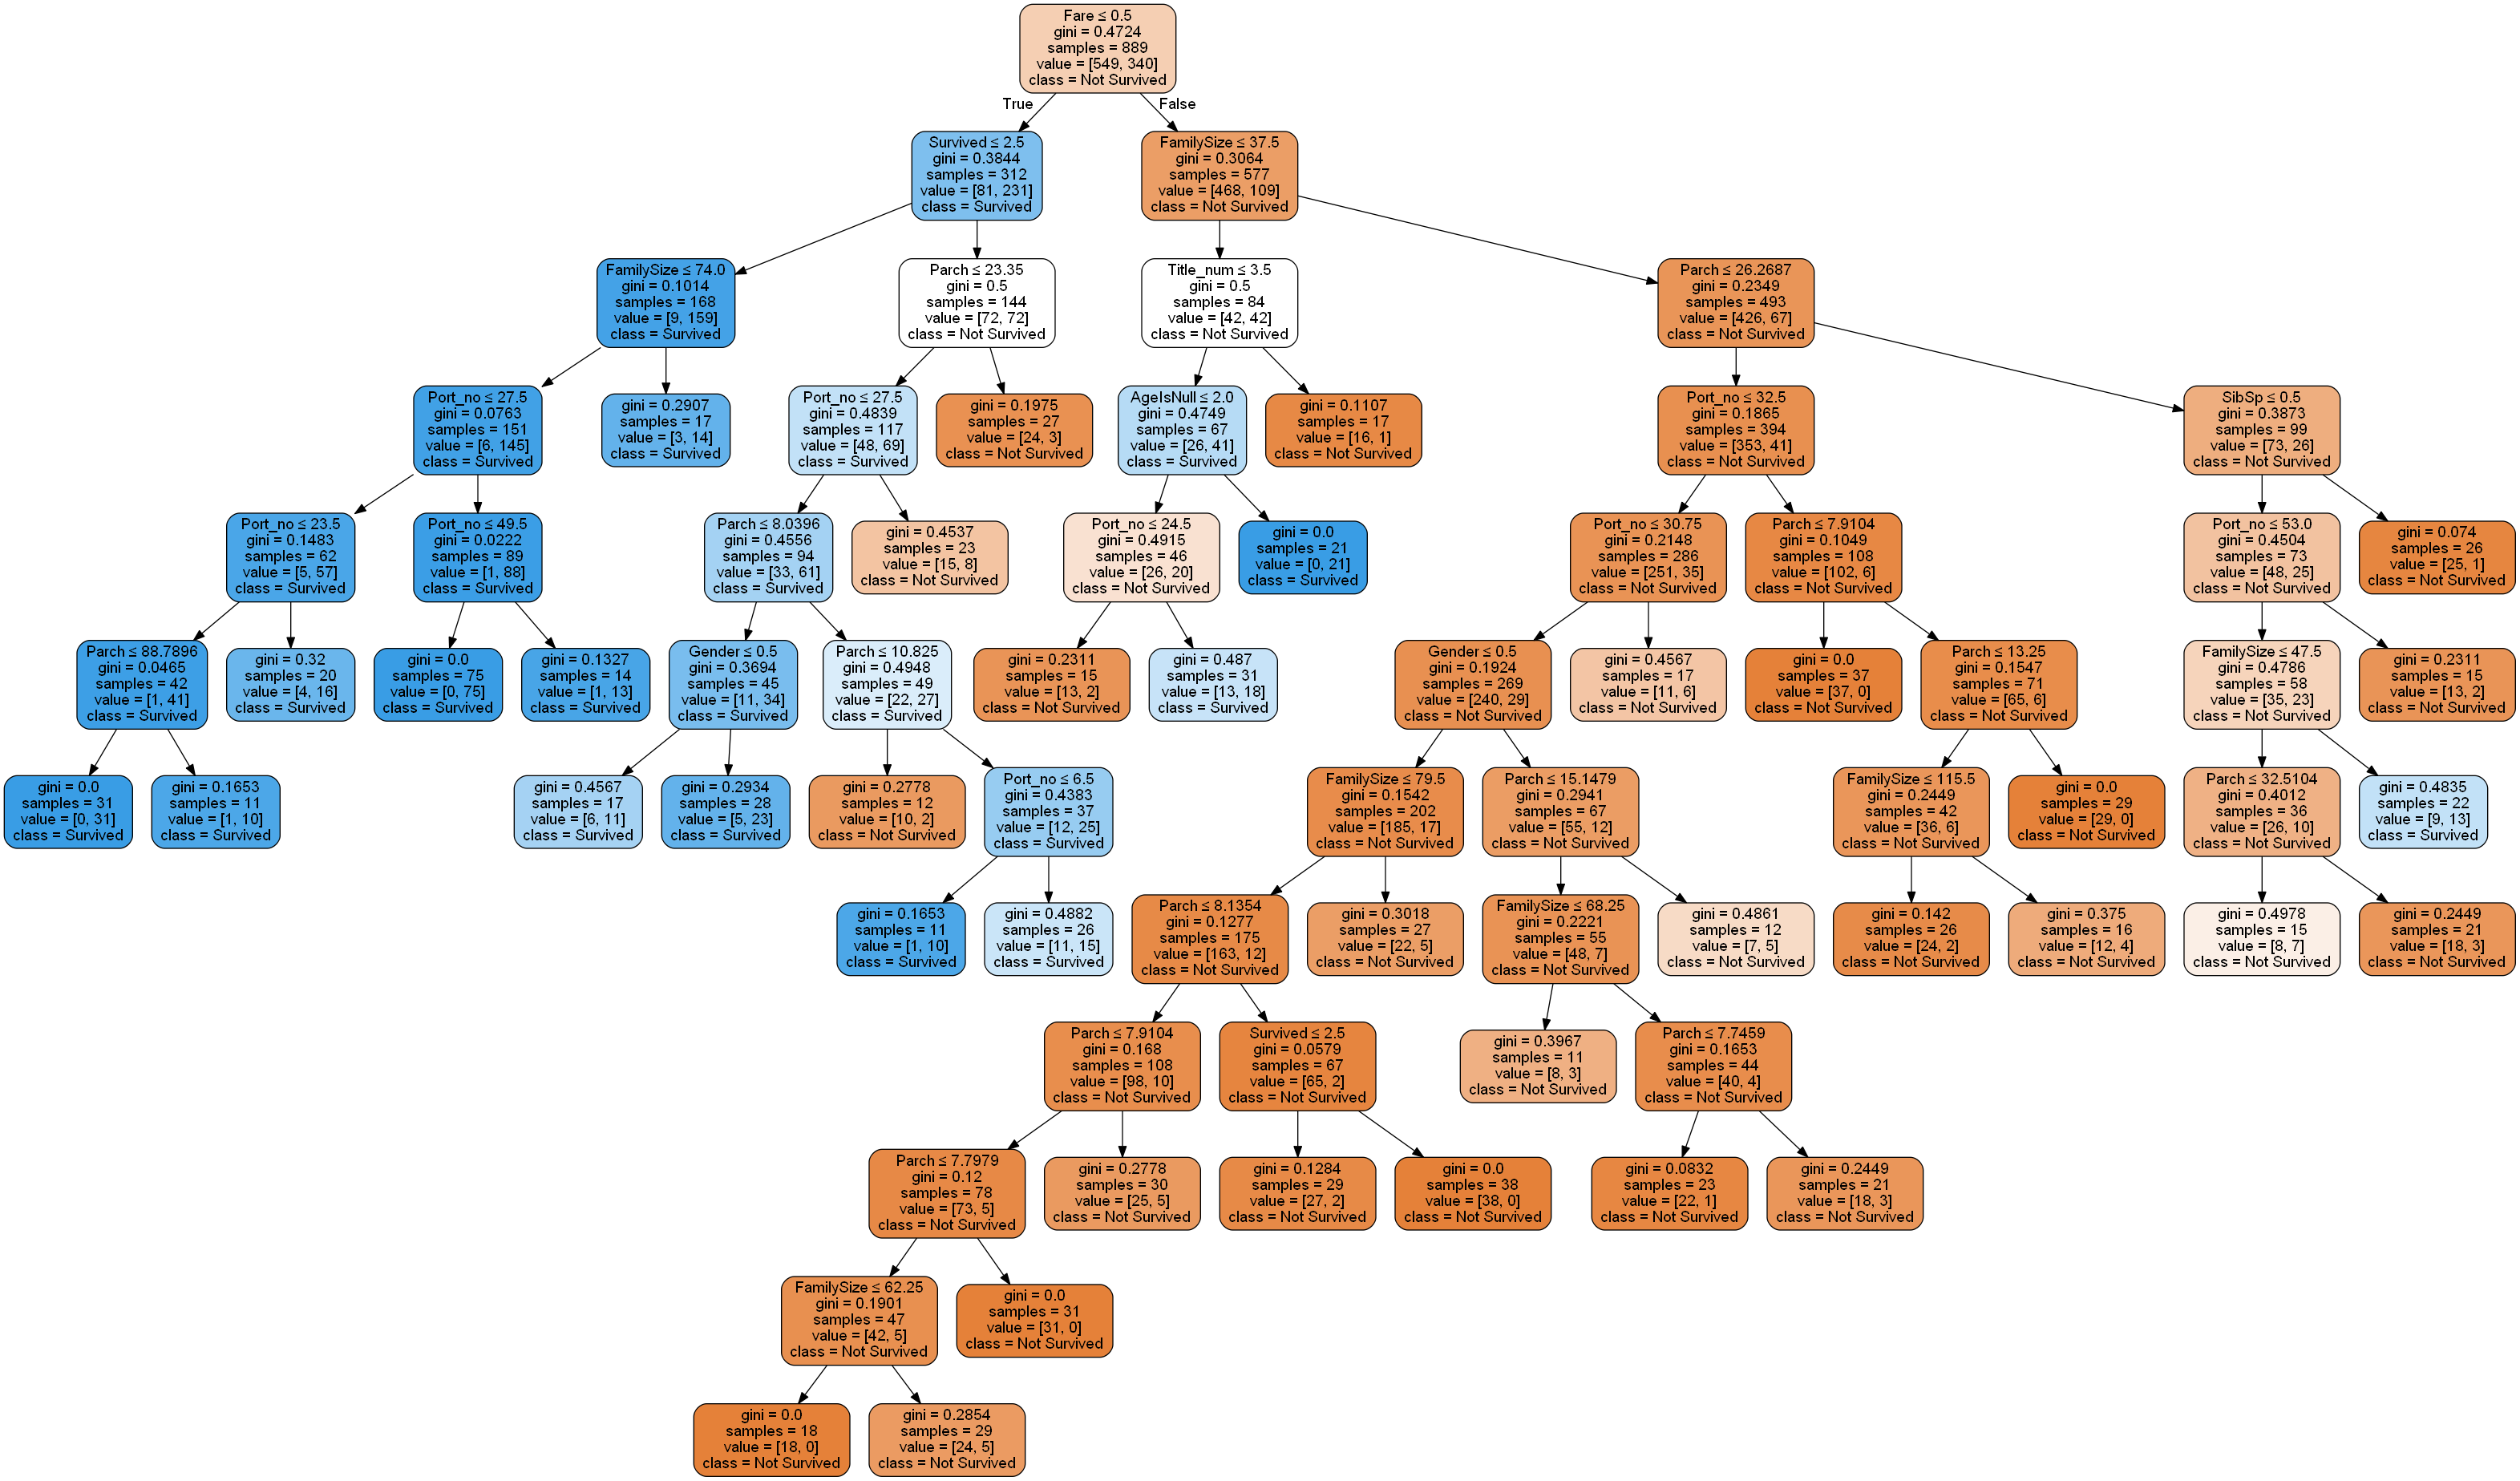

In [44]:
# tree visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydot 
dot_data = StringIO()
tree.export_graphviz(clf_dt.best_estimator_, out_file=dot_data, 
                     feature_names=train.columns.tolist(), 
                     class_names=['Not Survived','Survived'], 
                     filled=True, 
                     rounded=True,                           
                     special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## ExtraTreesClassifier

In [45]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
clf_et = ExtraTreesClassifier()

clf_et.get_params().keys()
max_depth = range(1, 110, 10) + [None]
n_estimators = range(1, 110, 10)
min_samples_split = range(2, 110, 10)
min_samples_leaf = range(1, 110, 10)


parameters = {'criterion': ('gini', 'entropy'), 
              'n_estimators': n_estimators, 
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

clf_et = grid_search.GridSearchCV(clf_et, parameters)  # with default 3-fold cross-validation
print clf_et.fit(train_data[:,:-1], np.reshape(train_data[:,-1:], (1, len(train_data)))[0])
print ''


# Results:
print 'Best score: ', clf_et.best_score_, ', using metric: ', clf_et.scorer_.func_name
print 'Best parameters: ', clf_et.best_params_
print 'Best estimator: ', clf_et.best_estimator_

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101], 'min_samples_split': [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102], 'criterion': ('gini', 'entropy'), 'max_depth': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, None], 'min_samples_leaf': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Best score:  0.835770528684 , using metric:  _passthrough_scorer
Best parameters:  {'min_samples_split': 22, 'n_estimators': 41, 'criterion': 'gini', 'max_depth': 31, 'min_s

(array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
         14000.,  16000.]), <a list of 9 Text xticklabel objects>)

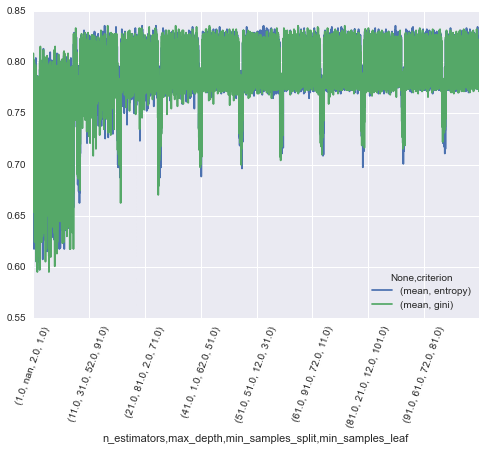

In [46]:
############################# Plot results #####################################################
col_list = ['mean', 'std', 'criterion', 'n_estimators', 'max_depth' , 'min_samples_split', 'min_samples_leaf']
df = pd.DataFrame(columns=col_list)
for params, mean_score, scores in clf_et.grid_scores_:    
    df = df.append(pd.Series([mean_score, 
                              scores.std(), 
                              params['criterion'],
                              params['n_estimators'],
                              params['max_depth'],
                              params['min_samples_split'],
                              params['min_samples_leaf']                              
                              ], 
                   index=col_list), ignore_index=True)
dfx = df.set_index(['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'criterion']).unstack(-1)[['mean']]
dfx.plot()
plt.xticks(rotation=70);

#################################################################################################################

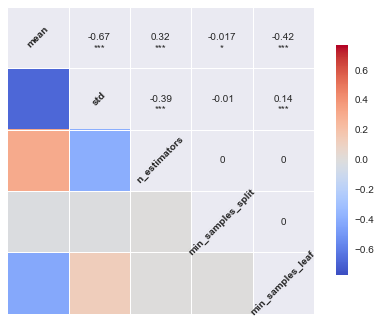

In [47]:
sns.corrplot(df);

(array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
         14000.,  16000.]), <a list of 9 Text xticklabel objects>)

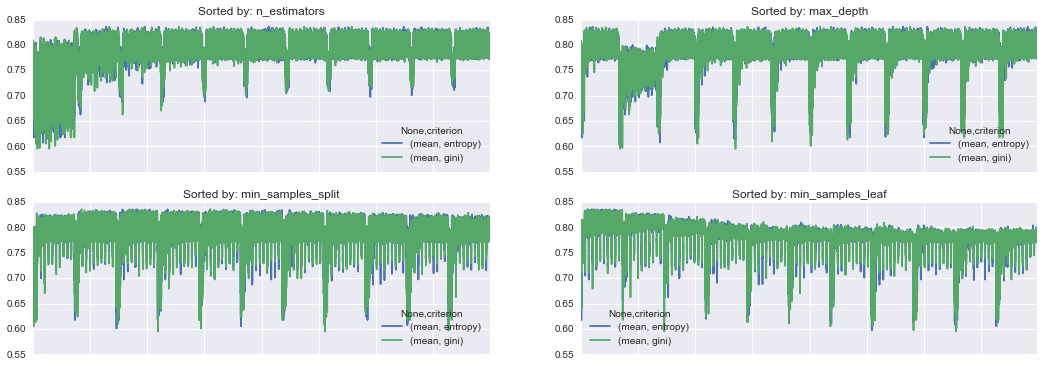

In [48]:
fig = plt.figure(figsize=(18,6), dpi=1600) 


ax1 = plt.subplot2grid((2,2),(0,0))
dfx.sortlevel(level=0).plot(ax=ax1)
ax1.set_xlabel('')
plt.title("Sorted by: n_estimators")
plt.xticks(visible=False)

ax2 = plt.subplot2grid((2,2),(0,1))
dfx.sortlevel(level=1).plot(ax=ax2)
ax2.set_xlabel('')
plt.title("Sorted by: max_depth")
plt.xticks(visible=False)

ax3 = plt.subplot2grid((2,2),(1,0))
dfx.sortlevel(level=2).plot(ax=ax3)
ax3.set_xlabel('')
plt.title("Sorted by: min_samples_split")
plt.xticks(visible=False)

ax4 = plt.subplot2grid((2,2),(1,1))
dfx.sortlevel(level=3).plot(ax=ax4)
ax4.set_xlabel('')
plt.title("Sorted by: min_samples_leaf")
plt.xticks(visible=False)

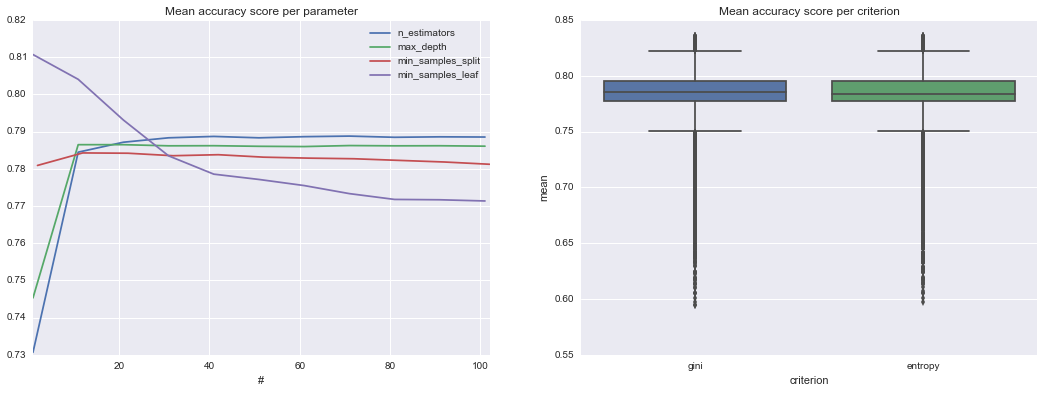

In [49]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
ax1 = plt.subplot2grid((1,2),(0,0))

df[['n_estimators', 'mean']].groupby('n_estimators').mean().plot(ax = ax1)
df[['max_depth', 'mean']].groupby('max_depth').mean().plot(ax = ax1)
df[['min_samples_split', 'mean']].groupby('min_samples_split').mean().plot(ax = ax1)
df[['min_samples_leaf', 'mean']].groupby('min_samples_leaf').mean().plot(ax = ax1)
ax1.legend(['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'])
ax1.set_xlabel('#')
plt.title('Mean accuracy score per parameter')

ax2 = plt.subplot2grid((1,2),(0,1))
ax2 = sns.boxplot(x="criterion", y="mean", data=df)
plt.title('Mean accuracy score per criterion');

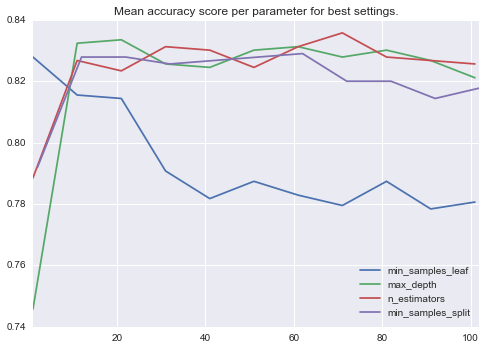

In [50]:
# Best settings:  {'min_samples_split': 22, 'n_estimators': 81, 'criterion': 'gini', 'max_depth': 71, 'min_samples_leaf': 1}

ax1 = df.ix[(df.min_samples_split==22)
      & (df.n_estimators==81) 
      & (df.criterion=='gini')
      & (df.max_depth==71) 
      #& (df.min_samples_leaf==1)
    ][['min_samples_leaf', 'mean']].plot(x='min_samples_leaf')

df.ix[(df.min_samples_split==22)
      & (df.n_estimators==81) 
      & (df.criterion=='gini')
      #& (df.max_depth==71) 
      & (df.max_depth.notnull())
      & (df.min_samples_leaf==1)
    ][['max_depth', 'mean']].plot(x='max_depth', ax = ax1)

df.ix[(df.min_samples_split==22)
      #& (df.n_estimators==81) 
      & (df.criterion=='gini')
      & (df.max_depth==71) 
      & (df.min_samples_leaf==1)
    ][['n_estimators', 'mean']].plot(x='n_estimators', ax = ax1)

df.ix[#(df.min_samples_split==22)
       (df.n_estimators==81) 
      & (df.criterion=='gini')
      & (df.max_depth==71) 
      & (df.min_samples_leaf==1)
    ][['min_samples_split', 'mean']].plot(x='min_samples_split', ax = ax1)

ax1.set_xlabel('')
plt.title('Mean accuracy score per parameter for best settings.')
# Best settings:  {'min_samples_split': 22, 'n_estimators': 81, 'criterion': 'gini', 'max_depth': 71, 'min_samples_leaf': 1}

ax1.legend(['min_samples_leaf', 'max_depth', 'n_estimators', 'min_samples_split'], loc='best');

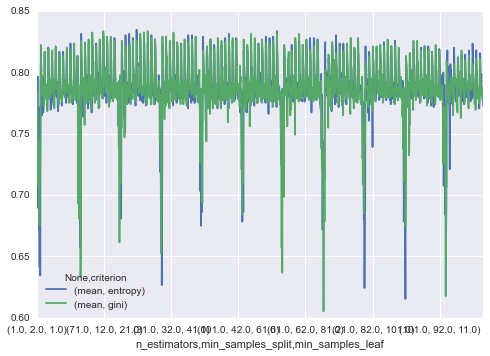

In [51]:
# plot mean score values for the given max_depth value
dfx.xs(21,level=1,axis=0).sortlevel(level=1).plot();

## Random Forest

Best score:  0.838020247469 , using metric:  _passthrough_scorer
Best parameters:  {'min_samples_split': 12, 'n_estimators': 71, 'criterion': 'entropy', 'min_samples_leaf': 1}
Best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Wall time: 22min 26s


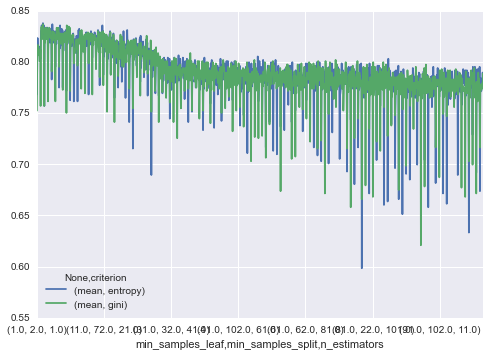

In [52]:
%%time

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

# clf.get_params()
n_estimators = range(1,110,10)
min_samples_split = range(2,110,10)
min_samples_leaf = range(1,110,10)

parameters = {'criterion':('gini', 'entropy'), 
              'n_estimators':n_estimators, 
              'min_samples_split':min_samples_split, 
              'min_samples_leaf':min_samples_leaf}

clf_rf = grid_search.GridSearchCV(clf_rf, parameters)  # with default 3-fold cross-validation

clf_rf.fit(train_data[:,:-1], np.reshape(train_data[:,-1:], (1, len(train_data)))[0])

# Results:
print 'Best score: ', clf_rf.best_score_, ', using metric: ', clf_rf.scorer_.func_name
print 'Best parameters: ', clf_rf.best_params_
print 'Best estimator: ', clf_rf.best_estimator_

############################# wyswietl wyniki na wykresie #####################################################
col_list = ['mean', 'std', 'criterion', 'min_samples_leaf', 'min_samples_split', 'n_estimators']
df = pd.DataFrame(columns=col_list)
for params, mean_score, scores in clf_rf.grid_scores_:    
    df = df.append(pd.Series([mean_score, 
                              scores.std(), 
                              params['criterion'],
                              params['min_samples_leaf'],
                              params['min_samples_split'],
                              params['n_estimators']
                              ], 
                   index=col_list), ignore_index=True)
df.set_index(['min_samples_leaf', 'min_samples_split', 'n_estimators', 'criterion']).unstack(-1)[['mean']].plot()
#df.set_index(['min_samples_leaf', 'min_samples_split', 'n_estimators', 'criterion']).unstack()[['std']].plot();

#################################################################################################################

# Sumarry and export

In [53]:
print 'BEST RESULTS: '
print '   1. Random Forest: ', clf_rf.best_score_.round(4)
print '   2. Extra Tree:    ', clf_et.best_score_.round(4)
print '   3. Decision Tree: ', clf_dt.best_score_.round(4)


BEST RESULTS: 
   1. Random Forest:  0.838
   2. Extra Tree:     0.8358
   3. Decision Tree:  0.8178


In [54]:
# Test set predictions and saving results to file
# predictions_export(clf_rf.predict(test_data), 'Titanic_Results_v3_RandomForest.csv')